# Problem 3 - Laser-driven electrostatic plasma wave 

1D simulation of a laser-driven electronstatic plasma wave.

We start by giving all the parameters needed for the simulation (outside of the laser pulse).

In [1]:
# Add zpic library to path
import sys
sys.path.append("../../lib")

import em1d
import numpy as np

# Time step (time between two consecutive iterations)
dt = 0.019

# Simulation time (simulation ends when tmax is reached)
tmax = 100

# Number of cells
nx  = 1000

# Simulation box size (dx=box/nx should be higher than dt)
box = 20.0


## Background plasma

# Particles per cell (don't change!)
ppc = 128

# Use a step density profile (no plasma until "start" and afterwards plasma density is 1)
electrons = em1d.Species( "electrons", -1.0, ppc,
                           density = em1d.Density( type = "step", start = 20.0))

# Initialize simulation
sim = em1d.Simulation( nx, box, dt, species = electrons )


Now that the simulation is initialized, we need to add the external field (laser).

Change the flat parameter at the next section. If you need to use the number pi, please write "np.pi".

In [2]:
# Add laser pulse (almost a square pulse)
# Choose "flat" parameter. What should it be to maximize plasma response?

#rise, fall, should be small compared to the flat parameter so we can get a almost square pulse 

sim.add_laser( em1d.Laser( start = 17.0, rise = 0.1, flat=2, fall=0.1 , a0 = 0.1, omega0 = 10.0, polarization = np.pi/2 ))

Now perform some final settings and let the simulation run.

In [3]:
# Set moving window
sim.set_moving_window()

# Set current smoothing
sim.set_smooth( em1d.Smooth(xtype = "compensated", xlevel = 4) )

n_lines=50

dt_waterfall=tmax/n_lines

# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

# Run the simulation
delta_n=np.empty((n_lines,nx))
#This will save
for i in range(0,n_lines):
    sim.run( dt_waterfall*i )
    delta_n[i]=np.abs(electrons.charge())


Running simulation up to t = 0 ...
n = 1, t = 0.019
Done.

Running simulation up to t = 2 ...
n = 106, t = 2.014
Done.

Running simulation up to t = 4 ...
n = 211, t = 4.009
Done.

Running simulation up to t = 6 ...
n = 316, t = 6.004
Done.

Running simulation up to t = 8 ...
n = 422, t = 8.018
Done.

Running simulation up to t = 10 ...
n = 527, t = 10.013
Done.

Running simulation up to t = 12 ...
n = 632, t = 12.008
Done.

Running simulation up to t = 14 ...
n = 737, t = 14.003
Done.

Running simulation up to t = 16 ...
n = 843, t = 16.017
Done.

Running simulation up to t = 18 ...
n = 948, t = 18.012
Done.

Running simulation up to t = 20 ...
n = 1053, t = 20.007
Done.

Running simulation up to t = 22 ...
n = 1158, t = 22.002
Done.

Running simulation up to t = 24 ...
n = 1264, t = 24.016
Done.

Running simulation up to t = 26 ...
n = 1369, t = 26.011
Done.

Running simulation up to t = 28 ...
n = 1474, t = 28.006
Done.

Running simulation up to t = 30 ...
n = 1579, t = 30.001
Done

We can observe E1 and the electron density in the plasma. We also plot E3 which is the direction in which the laser is polarized. That way you can observe where the laser is at the moment.

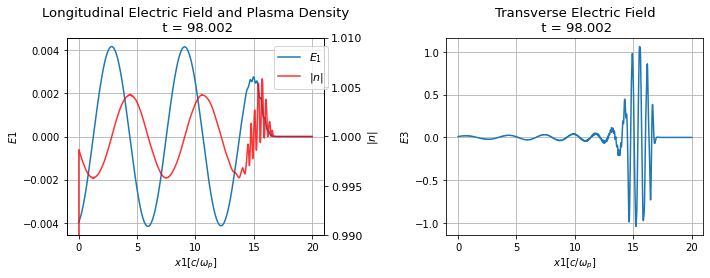

In [4]:
import matplotlib.pyplot as plt
import matplotlib
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,4))

matplotlib.rcParams.update({'font.size': 11})
# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

ax1.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ex, label = "$E_1$" )
ax1.set_xlabel("$x1 [c/\omega_p]$")
ax1.set_ylabel("$E1$")
ax1.set_title("Longitudinal Electric Field and Plasma Density\n t = {:g}".format(sim.t))
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(np.linspace(xmin, xmax, num = sim.nx), np.abs(electrons.charge()),'r', label = "$|n|$" , alpha = 0.8)
ax2.set_ylabel("|$n$|")
ax2.set_ylim(0.99,1.01)

ax3.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ez)
ax3.set_ylabel("$E3$")
ax3.set_xlabel("$x1 [c/\omega_p]$")
ax3.grid(True)
ax3.set_title("Transverse Electric Field\n t = {:g}".format(sim.t))

fig.legend(loc = (0.385,0.68))
fig.tight_layout()
plt.show()
delta_n=np.array(delta_n)

<Figure size 432x288 with 0 Axes>

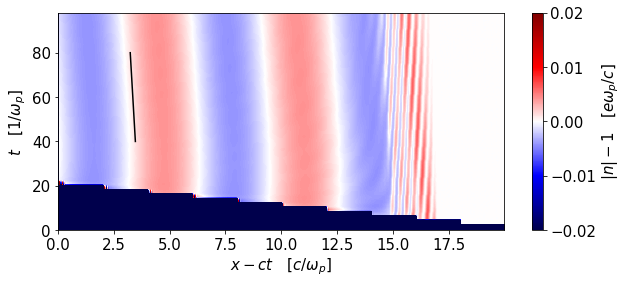

In [7]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 15})
plt.clf()
fig = plt.figure(figsize=(10,4))

verts=[]
plt.imshow(delta_n-1,extent=(0, nx*sim.dx, 0,sim.t),vmax=0.02,vmin=-0.02,origin='lower',aspect='auto',cmap='seismic')
plt.xlabel(r'$x-ct\quad [c/\omega_p]$')
plt.ylabel(r'$t\quad [1/\omega_p]$')
cbar=plt.colorbar()
cbar.set_label(r'$|n|-1\quad[e\omega_p/c]$')

#In this case the phase velocity would be  c (1 + (3.24-3.47)/(80-40) ) =0.995c
plt.plot([3.47,3.24],[40,80],'k')

plt.show()

# Longer laser length
#### Establishing the maximum plasma response

Now we need to establish if the plasma response is maximum for the selected laser length. Try two different lengths (longer and shorter than your calculation) and check if the wave amplitude decreases in size.

Try now with a longer laser length (everything from the first runs will be lost, but the pictures will stay there).

In [8]:
# Time step (time between two consecutive iterations)
dt = 0.019

# Simulation time (simulation ends when tmax is reached)
tmax = 100

# Number of cells
nx  = 1000

# Simulation box size (dx=box/nx should be higher than dt)
box = 20.0


## Background plasma

# Particles per cell (don't change!)
ppc = 128

# Use a step density profile (no plasma until "start" and afterwards plasma density is 1)
electrons1 = em1d.Species( "electrons1", -1.0, ppc,
                           density = em1d.Density( type = "step", start = 20.0))

# Initialize simulation
sim1 = em1d.Simulation( nx, box, dt, species = electrons1 )

# Add laser pulse (almost a square pulse)
# Change "flat" parameter. What should it be to maximize plasma response?

#rise 

sim1.add_laser( em1d.Laser( start = 17.0, rise = 0.1, flat=np.pi*2, fall=0.1 , a0 = 0.1, omega0 = 10.0, polarization = np.pi/2 ))

# Set moving window
sim1.set_moving_window()

# Set current smoothing
sim1.set_smooth( em1d.Smooth(xtype = "compensated", xlevel = 4) )


# Plot values at the center of the cells
xmin = sim1.emf.dx/2
xmax = sim1.emf.box - sim1.emf.dx/2

# Run the simulation
sim1.run( tmax )


Running simulation up to t = 100 ...
n = 5264, t = 100.016
Done.


We can check the electric field now. How does it compare with the initial one?

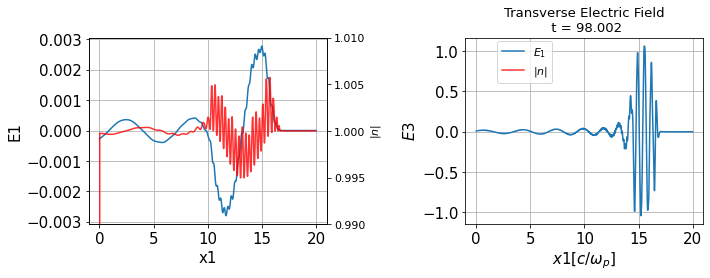

In [9]:
import matplotlib.pyplot as plt
import matplotlib
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10,4))
matplotlib.rcParams.update({'font.size': 11})
# Plot values at the center of the cells
xmin = sim1.emf.dx/2
xmax = sim1.emf.box - sim1.emf.dx/2

ax1.plot(np.linspace(xmin, xmax, num = sim1.nx), sim1.emf.Ex, label = "$E_1$" )
ax1.set_xlabel("x1")
ax1.set_ylabel("E1")
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(np.linspace(xmin, xmax, num = sim1.nx), np.abs(electrons1.charge()),'r', label = "$|n|$" , alpha = 0.8)
ax2.set_ylabel("|$n$|")
ax2.set_ylim(0.99,1.01)

ax3.plot(np.linspace(xmin, xmax, num = sim.nx), sim.emf.Ez)
ax3.set_ylabel("$E3$")
ax3.set_xlabel("$x1 [c/\omega_p]$")
ax3.grid(True)
ax3.set_title("Transverse Electric Field\n t = {:g}".format(sim.t))

fig.legend(loc = (0.7,0.70))
fig.tight_layout()
plt.show()

# Shorter laser length


Now try with a shorter laser length (not too short, keep it at the same order of magnitude - the flat parameter should be larger than the rise and fall parameters). Do the results make sense?

In [10]:
# Time step (time between two consecutive iterations)
dt = 0.019

# Simulation time (simulation ends when tmax is reached)
tmax = 100

# Number of cells
nx  = 1000

# Simulation box size (dx=box/nx should be higher than dt)
box = 20.0


## Background plasma

# Particles per cell (don't change!)
ppc = 128

# Use a step density profile (no plasma until "start" and afterwards plasma density is 1)
electrons2 = em1d.Species( "electrons2", -1.0, ppc,
                           density = em1d.Density( type = "step", start = 20.0))

# Initialize simulation
sim2 = em1d.Simulation( nx, box, dt, species = electrons2 )

# Add laser pulse (almost a square pulse)
# Change "flat" parameter. Choose a shorter length than in the original simulation

#rise 

sim2.add_laser( em1d.Laser( start = 17.0, rise = 0.1, flat=np.pi/2, fall=0.1 , a0 = 0.1, omega0 = 10.0, polarization = np.pi/2 ))

# Set moving window
sim2.set_moving_window()

# Set current smoothing
sim2.set_smooth( em1d.Smooth(xtype = "compensated", xlevel = 4) )


# Plot values at the center of the cells
xmin = sim2.emf.dx/2
xmax = sim2.emf.box - sim2.emf.dx/2

# Run the simulation
sim2.run( tmax )# Time step (time between two consecutive iterations)


Running simulation up to t = 100 ...
n = 5264, t = 100.016
Done.


We can check the electric field now. Did you obtain the result you were hoping?

<Figure size 432x288 with 0 Axes>

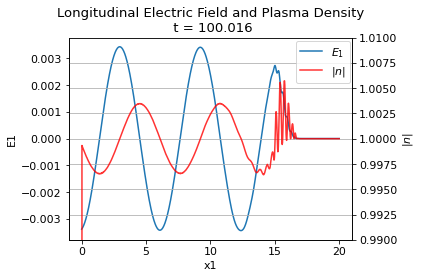

In [11]:
import matplotlib.pyplot as plt
import matplotlib
plt.clf()
fig, ax1 = plt.subplots()
matplotlib.rcParams.update({'font.size': 11})
# Plot values at the center of the cells
xmin = sim2.emf.dx/2
xmax = sim2.emf.box - sim2.emf.dx/2

ax1.plot(np.linspace(xmin, xmax, num = sim2.nx), sim2.emf.Ex, label = "$E_1$" )
ax1.set_xlabel("x1")
ax1.set_ylabel("E1")

ax2 = ax1.twinx()
ax2.plot(np.linspace(xmin, xmax, num = sim2.nx), np.abs(electrons2.charge()),'r', label = "$|n|$" , alpha = 0.8)
ax2.set_ylabel("|$n$|")
ax2.set_ylim(0.99,1.01)

plt.title("Longitudinal Electric Field and Plasma Density\n t = {:g}".format(sim2.t))
plt.grid(True)

fig.legend(loc = (0.7,0.70))
fig.tight_layout()
plt.show()